In [13]:
import numpy as np

def transform_and_translate(point, translation=(0, 0), rotation_angle=0, scale=1):
    # Convert the angle from degrees to radians
    angle_rad = np.radians(rotation_angle)
    
    # Define the rotation and scaling matrix
    transformation_matrix = np.array([
        [scale * np.cos(angle_rad), -scale * np.sin(angle_rad)],
        [scale * np.sin(angle_rad),  scale * np.cos(angle_rad)]
    ])
    
    # Apply transformation
    transformed_point = transformation_matrix @ np.array(point)
    
    # Apply translation
    translated_point = transformed_point - np.array(translation)
    
    return translated_point


Transformed and Translated Point: [-6.  3.]


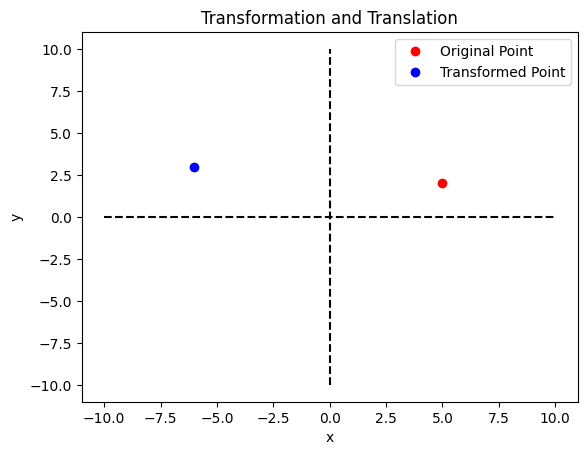

In [17]:
# Example usage:
point = (5, 2)
translation = (4,2)
rotation_angle = 90  # degrees
scale = 1

new_point = transform_and_translate(point, translation, rotation_angle, scale)
print("Transformed and Translated Point:", new_point)

# plot the original and transformed points
import matplotlib.pyplot as plt

# Original point
plt.plot(point[0], point[1], 'ro', label='Original Point')

# Transformed point
plt.plot(new_point[0], new_point[1], 'bo', label='Transformed Point')

# plot dashed lines along x and y axes
plt.plot([0, 0], [-10, 10], 'k--')
plt.plot([-10, 10], [0, 0], 'k--')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Transformation and Translation')
plt.legend()